In [5]:
#Uncomment if you want to unzip using code. Can also do it in directory manually
# from zipfile import ZipFile
# import os

# from_file = '/content/Data_Files/'
# to_file = '/content/Data_Files'
# file_name = f'{from_file}images.zip'

# if os.path.exists(file_name):
#     with ZipFile(file_name, 'r') as zip:
#         zip.extractall(path=to_file)
#     print('Extraction completed')
# else:
#     print('Zip file not found')



Extraction completed


## Import

In [6]:
# Import PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Other Imports

#Data Visualization and Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Machine Learning
from sklearn.model_selection import train_test_split

#Progress Bar
from tqdm.auto import tqdm

#Directory access
import os
from PIL import Image
import shutil
from pathlib import Path

## Reference Database
Contains information on a given image. For our case we only care about color

In [7]:

df= pd.read_csv("Data_Files/styles.csv",on_bad_lines='skip')
nan_values = df[df['baseColour'].isna()]
df.dropna(subset=['baseColour'], inplace=True)
label_df = df[['id', 'baseColour']].copy()
label_df

,id,baseColour
0,15970,Navy Blue
1,39386,Blue
2,59263,Silver
3,21379,Black
4,53759,Grey
...,...,...
44419,17036,White
44420,6461,Red
44421,18842,Blue
44422,46694,Blue


## Load and Organize Images

In [8]:
#Creates a folder called Data in the following format
'''

    Parent directory containing the subdirectories (classes):
        Data
            Black
                Img1
                Img2
            Blue
                Img3
                Img4
            Brown
                Img5
                Img6
            etc.
'''
def label_data_inFile(label_df,train_dir,test_dir,image_dir):
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Randomly sample the data using an 80-20 split
  train_df, test_df = train_test_split(label_df, test_size=0.2, random_state=42)

  # Iterate over unique colors in the second column of the training set
  unique_colors = train_df[train_df.columns[1]].unique()
  for color in unique_colors:
      # Create a directory for each unique color in 'train'
      color_train_dir = os.path.join(train_dir, color)
      os.makedirs(color_train_dir, exist_ok=True)

      # Filter the training DataFrame based on the color
      filtered_train_df = train_df[train_df[train_df.columns[1]] == color]

      # Move the images to the corresponding color directory in 'train'
      for index, row in filtered_train_df.iterrows():
          image_name = str(row[train_df.columns[0]]) + '.jpg'  # Assuming image extension is .jpg
          image_path = os.path.join(image_dir, image_name)
          destination_path = os.path.join(color_train_dir, image_name)

          if os.path.exists(destination_path):
              print(f"Image '{image_name}' already exists in '{color_train_dir}'. Skipping...")
          else:
              try:
                  shutil.move(image_path, destination_path)
                  print(f"Image '{image_name}' moved to '{color_train_dir}'.")
              except Exception as e:
                  print(f"Error moving image '{image_name}': {str(e)}")

  # Iterate over unique colors in the second column of the test set
  unique_colors = test_df[test_df.columns[1]].unique()
  for color in unique_colors:
      # Create a directory for each unique color in 'test'
      color_test_dir = os.path.join(test_dir, color)
      os.makedirs(color_test_dir, exist_ok=True)

      # Filter the test DataFrame based on the color
      filtered_test_df = test_df[test_df[test_df.columns[1]] == color]

      # Move the images to the corresponding color directory in 'test'
      for index, row in filtered_test_df.iterrows():
          image_name = str(row[test_df.columns[0]]) + '.jpg'  # Assuming image extension is .jpg
          image_path = os.path.join(image_dir, image_name)
          destination_path = os.path.join(color_test_dir, image_name)

          if os.path.exists(destination_path):
              print(f"Image '{image_name}' already exists in '{color_test_dir}'. Skipping...")
          else:
              try:
                  shutil.move(image_path, destination_path)
                  print(f"Image '{image_name}' moved to '{color_test_dir}'.")
              except Exception as e:
                  print(f"Error moving image '{image_name}': {str(e)}")

#check directories to ensure proper train test split
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")




In [9]:
# Create parent directories for 'train' and 'test'
#When this code is run the images in the 'image' folder will be moved to Data/train and Data/test. If you want to re run the code there will be no images in the 'image' file so you have to unzip the image.zip
train_dir ='Data/train'
test_dir = 'Data/test'
image_dir='Data_Files/images'

label_data_inFile(label_df,train_dir,test_dir,image_dir)




Streaming output truncated to the last 5000 lines.
Image '24422.jpg' moved to 'Data/test/Black'.
Image '39220.jpg' moved to 'Data/test/Black'.
Image '3472.jpg' moved to 'Data/test/Black'.
Image '54133.jpg' moved to 'Data/test/Black'.
Image '57522.jpg' moved to 'Data/test/Black'.
Image '8125.jpg' moved to 'Data/test/Black'.
Image '13835.jpg' moved to 'Data/test/Black'.
Image '8998.jpg' moved to 'Data/test/Black'.
Image '6154.jpg' moved to 'Data/test/Black'.
Image '43786.jpg' moved to 'Data/test/Black'.
Image '39815.jpg' moved to 'Data/test/Black'.
Image '42131.jpg' moved to 'Data/test/Black'.
Image '16178.jpg' moved to 'Data/test/Black'.
Image '51370.jpg' moved to 'Data/test/Black'.
Image '48513.jpg' moved to 'Data/test/Black'.
Image '10635.jpg' moved to 'Data/test/Black'.
Image '30484.jpg' moved to 'Data/test/Black'.
Image '24639.jpg' moved to 'Data/test/Black'.
Image '3256.jpg' moved to 'Data/test/Black'.
Image '46563.jpg' moved to 'Data/test/Black'.
Image '20816.jpg' moved to 'Data/t

In [10]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
image_path = Path('Data')
walk_through_dir(image_path)

## Create Image Dataset

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")


            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

In [13]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # convert to torch.Tensor
    transforms.ToTensor()
])

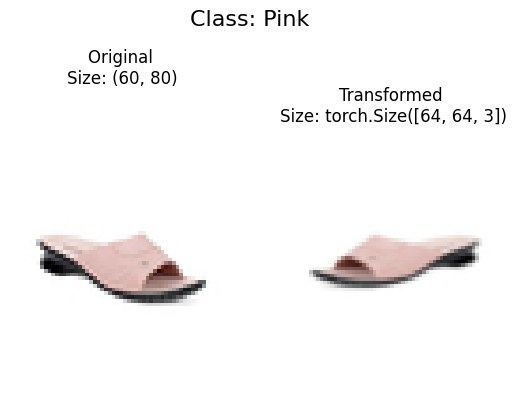

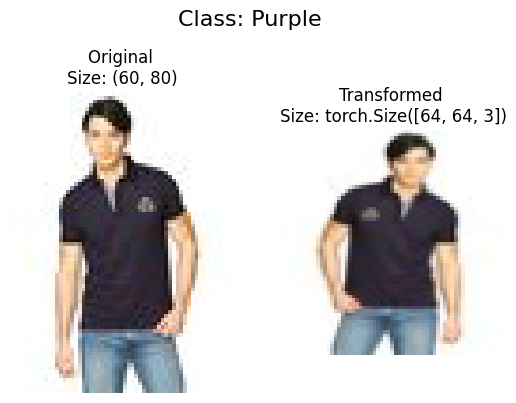

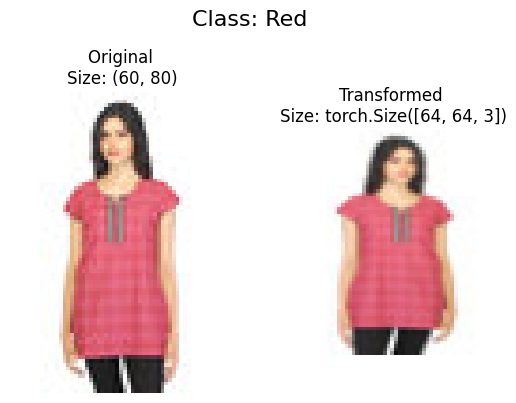

In [14]:
# Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [ ]:
# Use ImageFolder to create dataset(s)
train_dir = 'Data/train'
test_dir = 'Data/test'
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")
# Get class names as a list
class_names= train_data.classes
# Number of datapoints per class label
class_dict_train = train_data.class_to_idx
class_dict_test = test_data.class_to_idx

class_names,class_dict_test,class_dict_train

In [16]:
len(train_data), len(test_data)

(35523, 8881)

## Constructing Model and Training

ColorDetectionModel follows a similar architecture to the popular VGG, which is a standard deep Convolutional Neural Network (CNN), architecture with multiple layers (our case has 2 conv layers). We adjust some of the paramater such as padding. We pad the images given that there is a lot of white space and we only care about the image in the center. Through testing we found the proper padding at each level.

In [17]:
class ColorDetectionModel(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden_units*19*19, #adjust based on padding and other params
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = ColorDetectionModel(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

ColorDetectionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3610, out_features=46, bias=True)
  )
)

In [18]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


#Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    #Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    #Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)


        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )


        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)


    return results

def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

## Model with no data augmentation

In [19]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

#Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)


BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7ff53810b850>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff538152fb0>)

In [20]:
#Test model on one image to ensure functionality

img_batch, label_batch = next(iter(train_dataloader_simple))

#get single image
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

#test forward pass
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0033, -0.0045, -0.0108, -0.0121,  0.0460,  0.0242,  0.0214,  0.0164,
         -0.0197, -0.0009, -0.0054, -0.0321, -0.0128,  0.0184, -0.0252, -0.0186,
         -0.0231,  0.0330,  0.0091, -0.0194,  0.0066, -0.0278, -0.0103,  0.0059,
          0.0133, -0.0180,  0.0486,  0.0056, -0.0534, -0.0045, -0.0195,  0.0216,
          0.0040,  0.0067,  0.0139,  0.0186,  0.0002,  0.0368,  0.0011,  0.0148,
         -0.0088, -0.0155,  0.0036, -0.0065, -0.0070, -0.0289]],
       device='cuda:0')

Output prediction probabilities:
tensor([[0.0218, 0.0216, 0.0215, 0.0215, 0.0228, 0.0223, 0.0222, 0.0221, 0.0213,
         0.0217, 0.0216, 0.0211, 0.0215, 0.0221, 0.0212, 0.0213, 0.0212, 0.0225,
         0.0219, 0.0213, 0.0219, 0.0211, 0.0215, 0.0219, 0.0220, 0.0214, 0.0228,
         0.0219, 0.0206, 0.0216, 0.0213, 0.0222, 0.0218, 0.0219, 0.0220, 0.0221,
         0.0217, 0.0226, 0.0218, 0.0221, 0.0215, 0.0214, 0.0218, 0.0216, 0.0216,
    

In [21]:
#Further ensure model functionality and look at dimensions at each layer
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
ColorDetectionModel                      [1, 46]                   --
├─Sequential: 1-1                        [1, 10, 34, 34]           --
│    └─Conv2d: 2-1                       [1, 10, 66, 66]           280
│    └─ReLU: 2-2                         [1, 10, 66, 66]           --
│    └─Conv2d: 2-3                       [1, 10, 69, 69]           410
│    └─ReLU: 2-4                         [1, 10, 69, 69]           --
│    └─MaxPool2d: 2-5                    [1, 10, 34, 34]           --
├─Sequential: 1-2                        [1, 10, 19, 19]           --
│    └─Conv2d: 2-6                       [1, 10, 36, 36]           910
│    └─ReLU: 2-7                         [1, 10, 36, 36]           --
│    └─Conv2d: 2-8                       [1, 10, 38, 38]           910
│    └─ReLU: 2-9                         [1, 10, 38, 38]           --
│    └─MaxPool2d: 2-10                   [1, 10, 19, 19]           --
├─Sequentia

In [22]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = ColorDetectionModel(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2372 | train_acc: 0.3673 | test_loss: 1.9108 | test_acc: 0.4511
Epoch: 2 | train_loss: 1.7760 | train_acc: 0.4818 | test_loss: 1.7546 | test_acc: 0.4990
Epoch: 3 | train_loss: 1.5977 | train_acc: 0.5353 | test_loss: 1.5882 | test_acc: 0.5447
Epoch: 4 | train_loss: 1.4813 | train_acc: 0.5690 | test_loss: 1.5201 | test_acc: 0.5660
Epoch: 5 | train_loss: 1.4125 | train_acc: 0.5846 | test_loss: 1.5342 | test_acc: 0.5657
Epoch: 6 | train_loss: 1.3630 | train_acc: 0.5976 | test_loss: 1.4955 | test_acc: 0.5758
Epoch: 7 | train_loss: 1.3143 | train_acc: 0.6075 | test_loss: 1.4521 | test_acc: 0.5980
Epoch: 8 | train_loss: 1.2674 | train_acc: 0.6226 | test_loss: 1.4836 | test_acc: 0.5847
Epoch: 9 | train_loss: 1.2392 | train_acc: 0.6261 | test_loss: 1.4306 | test_acc: 0.5996
Epoch: 10 | train_loss: 1.2036 | train_acc: 0.6378 | test_loss: 1.4728 | test_acc: 0.5796
Total training time: 308.755 seconds


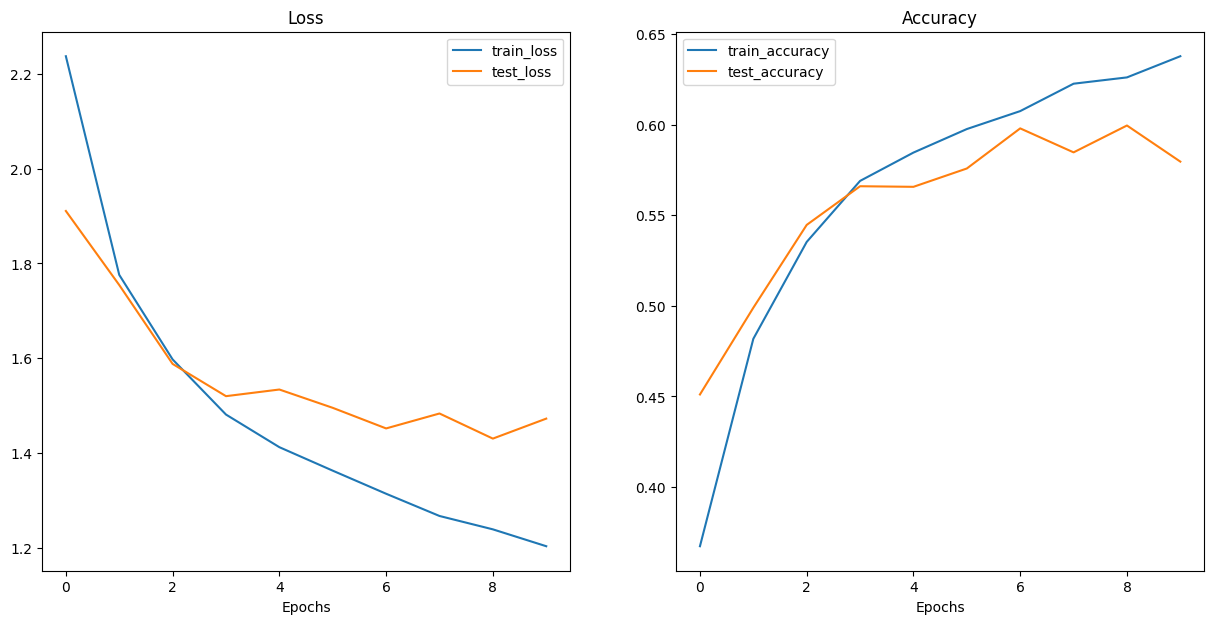

In [23]:
plot_loss_curves(model_0_results)

## Model w Data Augmentation

Data augmentation is a technique used to enhance the training data by applying various transformations or manipulations to the existing data.

In [24]:
# Create training transform with TrivialAugment

train_dir = 'Data/train'
test_dir = 'Data/test'

train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple



(Dataset ImageFolder
     Number of datapoints: 35523
     Root location: Data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 8881
     Root location: Data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [25]:
# Turn Datasets into DataLoader's

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7ff4480c8a30>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff441da24a0>)

In [26]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = ColorDetectionModel(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

ColorDetectionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3610, out_features=46, bias=True)
  )
)

In [27]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.5700 | train_acc: 0.2868 | test_loss: 2.1101 | test_acc: 0.4098
Epoch: 2 | train_loss: 2.2428 | train_acc: 0.3769 | test_loss: 1.9195 | test_acc: 0.4585
Epoch: 3 | train_loss: 2.1338 | train_acc: 0.3981 | test_loss: 1.8513 | test_acc: 0.4686
Epoch: 4 | train_loss: 2.0814 | train_acc: 0.4109 | test_loss: 1.7628 | test_acc: 0.4924
Epoch: 5 | train_loss: 2.0355 | train_acc: 0.4264 | test_loss: 1.7591 | test_acc: 0.5082
Epoch: 6 | train_loss: 1.9852 | train_acc: 0.4423 | test_loss: 1.6605 | test_acc: 0.5248
Epoch: 7 | train_loss: 1.9462 | train_acc: 0.4497 | test_loss: 1.6233 | test_acc: 0.5385
Epoch: 8 | train_loss: 1.9074 | train_acc: 0.4616 | test_loss: 1.6274 | test_acc: 0.5377
Epoch: 9 | train_loss: 1.8740 | train_acc: 0.4708 | test_loss: 1.5603 | test_acc: 0.5603
Epoch: 10 | train_loss: 1.8458 | train_acc: 0.4783 | test_loss: 1.5573 | test_acc: 0.5532
Total training time: 388.151 seconds


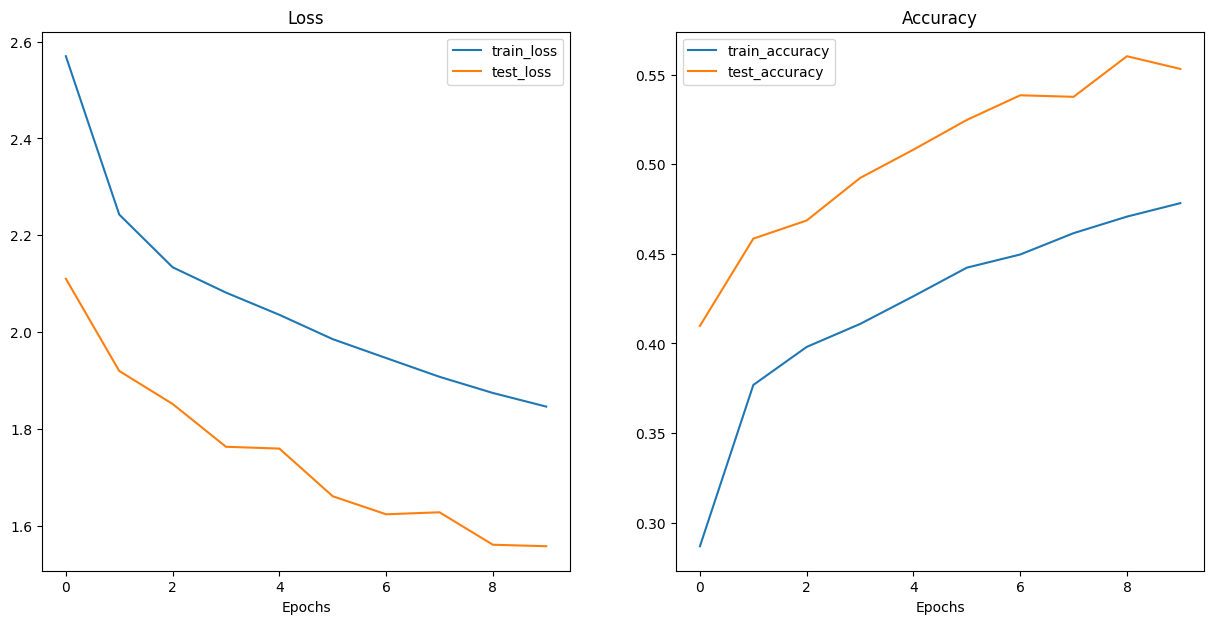

In [28]:
plot_loss_curves(model_1_results)

In [36]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,2.237220,0.367321,1.910775,0.451088
1,1.776015,0.481820,1.754598,0.498968
2,1.597655,0.535300,1.588168,0.544693
3,1.481343,0.568979,1.520132,0.566038
4,1.412518,0.584618,1.534151,0.565714
5,1.362980,0.597604,1.495528,0.575831
6,1.314297,0.607514,1.452075,0.597975
7,1.267399,0.622637,1.483576,0.584737
8,1.239201,0.626116,1.430605,0.599562
9,1.203597,0.637808,1.472761,0.579626


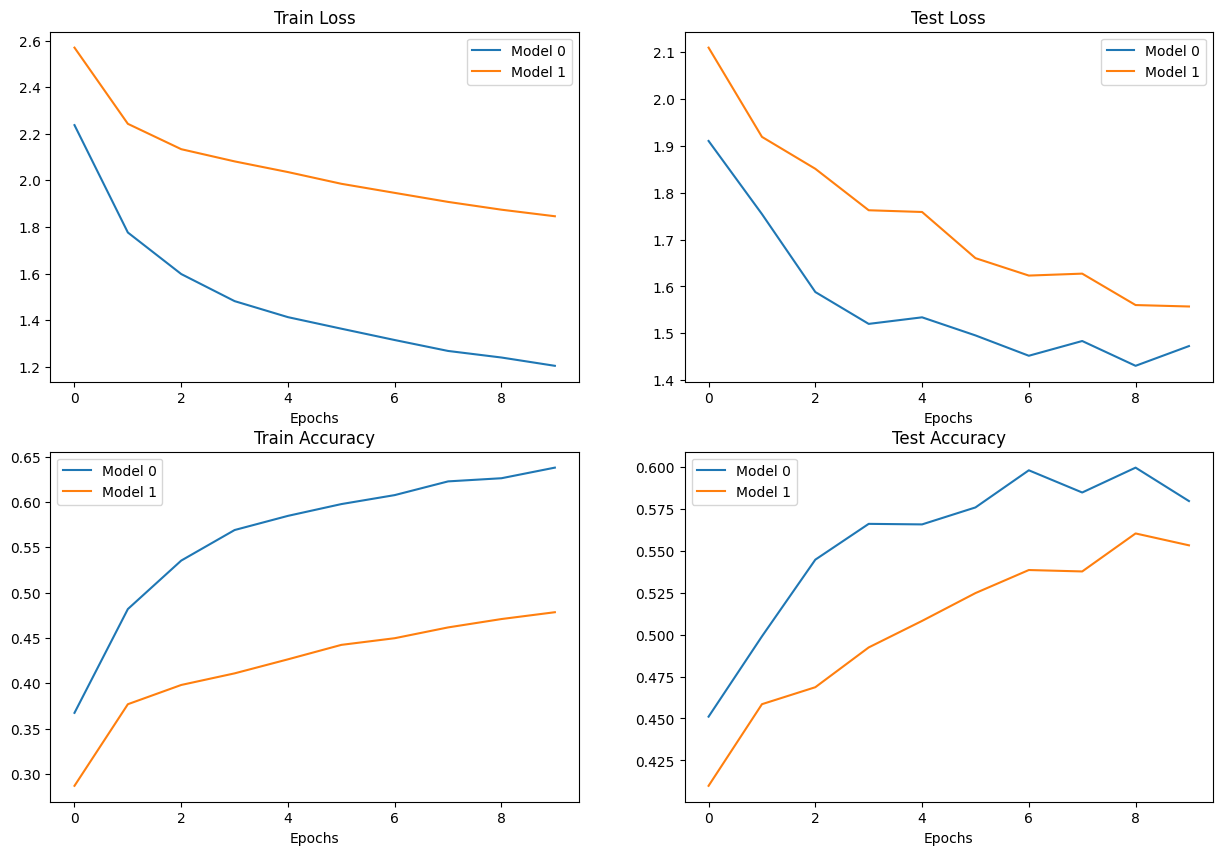

In [37]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

Based on our evaluation, we have determined that data augmentation is not necessary for our original model, model_0. The performance of model_0 was superior compared to the model trained on augmented data. Since model_0 does not exhibit overfitting and already performs well, the additional variations introduced by data augmentation are not required and lead to lower accuracy. Therefore, we have decided to proceed with using model_0 for testing on new data.

## Testing on new data

This is data taken from a new data set. This data was not used in training or testing. The goal is to see the models performance on these new images.

In [29]:
def move_images(df, source_dir, target_dir):
    """
    Parent directory containing the subdirectories (classes):
        New Images
            Black
                Img1
                Img2
            Blue
                Img3
                Img4
            Brown
                Img5
                Img6
            etc.
    """

    # Create the target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Create subdirectories for each class in the target directory
    unique_classes = df[df.columns[1]].unique()
    for class_name in unique_classes:
        class_dir = os.path.join(target_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

    # Move images to the corresponding class subdirectories
    for _, row in df.iterrows():
        filename = str(row[df.columns[0]])
        class_name = row[df.columns[1]]

        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, class_name, filename)

        try:
            shutil.move(source_path, target_path)
        except FileNotFoundError:
            print(f"File not found: {filename}. Skipping...")
            continue
def pred_and_plot_image(model: torch.nn.Module, image_path, true_label, class_names, transform, device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # load image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    target_image = target_image / 255.

    if transform:
        target_image = transform(target_image)

    model.to(device)
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot the image
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"True: {true_label} | Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"True: {true_label} | Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    plt.title(title)
    plt.axis(False)

    return class_names[target_image_pred_label]

def classify_image_colors(parent_directory,
                          predicted_labels=[],
                          true_labels=[]):
    # Iterate over the subdirectories (classes)
  for class_name in os.listdir(parent_directory):
      class_directory = os.path.join(parent_directory, class_name)

      # Iterate over the image files within each subdirectory
      for image_file in os.listdir(class_directory):
          image_path = os.path.join(class_directory, image_file)
          true_label = class_name

          pred_label = pred_and_plot_image(model=model_0,
                                          image_path=image_path,
                                          class_names=class_names,
                                          transform=custom_image_transform,
                                          true_label=true_label,
                                          device=device)
          plt.show()
          # Append the predicted and true labels to the lists
          predicted_labels.append(pred_label)
          true_labels.append(true_label)

  return predicted_labels,true_labels


In [30]:

label_df_new= pd.read_csv('Data_Files/test_new/_annotations.csv')
label_df_new = label_df_new[['filename', 'class']].copy()
label_df_new['class']=label_df_new['class'].str.capitalize()
label_df_new

,filename,class
0,sofa-sero-2-seater-in-dark-brown-colour-1f85fc...,Brown
1,chocolate-box-candies-allsorts-wallpaper-previ...,Brown
2,photo-1593005510509-d05b264f1c9c_jpeg.rf.6b810...,Red
3,6_jpg.rf.de61ca52c767554e4aae5233cf61d821.jpg,Yellow
4,5_jpg.rf.e8fd25bcb8fa5c4443f18c677ad8ea68.jpg,Blue
5,11_jpg.rf.5b9bbf80a84cc0a14948a67f85b8547c.jpg,Brown
6,download_jpeg.rf.3e34d9fea14caf3efc93646dc0049...,Black
7,2_jpg.rf.c9746fc494a394792fb08992d6dae48b.jpg,Red
8,1200px-Color_icon_green-svg_png.rf.8b9d2a468ea...,Green
9,1200px-Color_icon_green-svg_png.rf.8b9d2a468ea...,Green


In [31]:
source_dir='Data_Files/test_new'
target_dir='Data/New Images'
move_images(label_df_new,source_dir,target_dir)

File not found: sofa-sero-2-seater-in-dark-brown-colour-1f85fcd-interwood-mobel_png.rf.8463c286c8c1b328ce4bff9ed078c5d5.jpg. Skipping...
File not found: chocolate-box-candies-allsorts-wallpaper-preview_jpeg.rf.1809baec29623a185b90a19d4ef4c245.jpg. Skipping...
File not found: photo-1593005510509-d05b264f1c9c_jpeg.rf.6b8108dd602666698f4021c5865e2a7e.jpg. Skipping...
File not found: 6_jpg.rf.de61ca52c767554e4aae5233cf61d821.jpg. Skipping...
File not found: 5_jpg.rf.e8fd25bcb8fa5c4443f18c677ad8ea68.jpg. Skipping...
File not found: 11_jpg.rf.5b9bbf80a84cc0a14948a67f85b8547c.jpg. Skipping...
File not found: download_jpeg.rf.3e34d9fea14caf3efc93646dc0049c57.jpg. Skipping...
File not found: 2_jpg.rf.c9746fc494a394792fb08992d6dae48b.jpg. Skipping...
File not found: 1200px-Color_icon_green-svg_png.rf.8b9d2a468ead395dd14aa50c2a62d078.jpg. Skipping...
File not found: 1200px-Color_icon_green-svg_png.rf.8b9d2a468ead395dd14aa50c2a62d078.jpg. Skipping...
File not found: 1200px-Color_icon_green-svg_png

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'Brown'

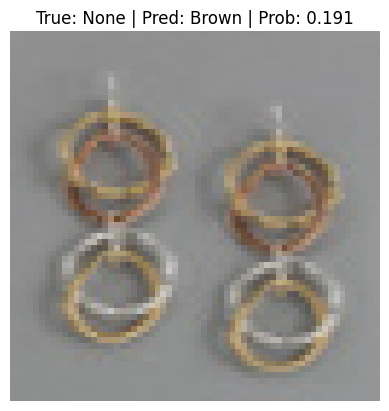

In [32]:
# Pred on our custom image
custom_image_path = 'Data_Files/images/59768.jpg'

# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    true_label= None, #True label unknown want model to predict
                    device=device)

In [33]:
#To predict new labeled test data
parent_directory = 'Data/New Images'

predicted_labels,true_labels=classify_image_colors(parent_directory)

# Calculate the accuracy
total_examples = len(predicted_labels)
correct_predictions = np.sum(np.array(predicted_labels) == np.array(true_labels))
accuracy = correct_predictions / total_examples * 100

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: nan%


<ipython-input-33-36f6559b1478>:9: RuntimeWarning: invalid value encountered in long_scalars
  accuracy = correct_predictions / total_examples * 100
